In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from scipy.interpolate import interp1d
import helper

/Users/csengepetak/Documents/GitHub/CA_GRN2/helper.py:156: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  next_step = windows.dot(grn)
/Users/csengepetak/Documents/GitHub/CA_GRN2/helper.py:177: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'C', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  next_step = gene_vals.dot(internal_grn)


In [5]:
root="results_new_rules"

# Load GRN

# Parameters
rule = 70
grn_size = 22
num_cells = 22
dev_steps = 22
geneid = 1 #which gene was used to get fitness
seed_ints = [69904,149796]
try_seedints = [69904,149796,1024, 4147842,1238860,2481300]

#Targets
all_targs=[]
for s in try_seedints:
    random_grns=np.random.randn(5, grn_size+2, grn_size).astype(np.float64)
    targets, phenos, fitnesses = helper.get_pop_TPF(random_grns, len(random_grns), num_cells, grn_size, dev_steps, geneid, rule, s)
    all_targs.append(targets)

#Check GRNs from the last generation
varied_phenos, varied_fits, varied_genos = helper.try_grn(True, rule, seed_ints, try_seedints, grn_size, geneid, root, num_cells, dev_steps)
env1_phenos, env1_fits, env1_genos = helper.try_grn(False, rule, seed_ints[0], try_seedints, grn_size, geneid, root, num_cells, dev_steps)
env2_phenos, env2_fits, env2_genos = helper.try_grn(False, rule, seed_ints[1], try_seedints, grn_size, geneid, root, num_cells, dev_steps)

varied_df = pd.DataFrame(varied_fits.T, columns = try_seedints)
env1_df = pd.DataFrame(env1_fits.T, columns = try_seedints)
env2_df = pd.DataFrame(env2_fits.T, columns = try_seedints)
dfs=[varied_df, env1_df, env2_df]

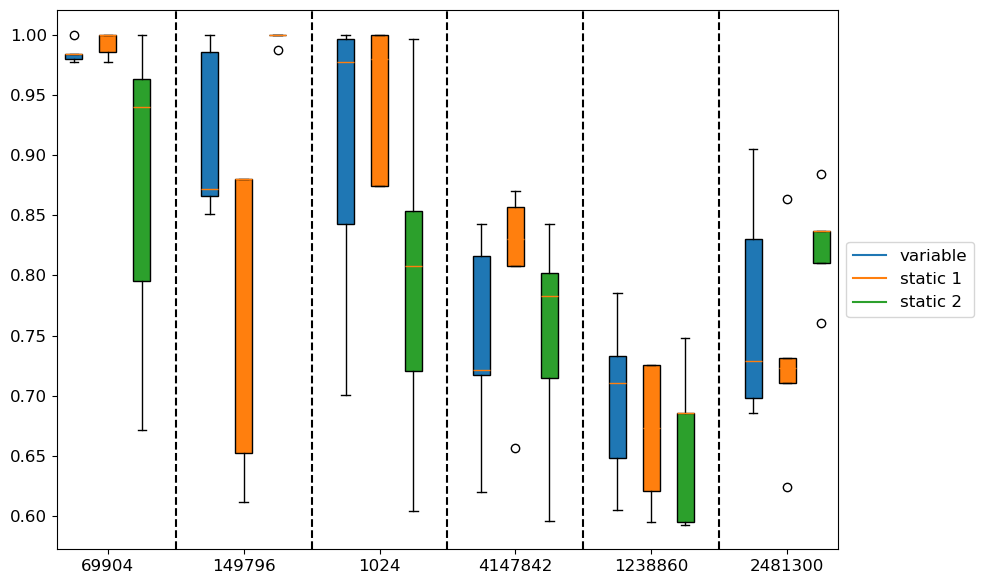

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['C0', 'C1', 'C2']
# Loop through each DataFrame and plot the boxplots
for i, df in enumerate(dfs):
    # Plot the boxplot, with positions offset for each dataframe
    bp = ax.boxplot(df.values, positions=np.arange(df.shape[1]) * (len(dfs) + 1) + i, patch_artist=True)
    # Set the box colors
    for box in bp['boxes']:
        box.set(facecolor=colors[i])
ax.set_xticks(np.arange(varied_df.shape[1]) * (len(dfs) + 1) + 1)
ax.set_xticklabels(varied_df.columns)

# Create legend for the colors
labels=["variable", "static 1", "static 2"]
for i, color in enumerate(colors):
    ax.plot([], c=color, label=labels[i])

# Add legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

for i in range(1, varied_df.shape[1]):
    # Position the line between each set
    x_position = i * (len(dfs) + 1) - 1
    ax.axvline(x=x_position, color='black', linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Unseen')

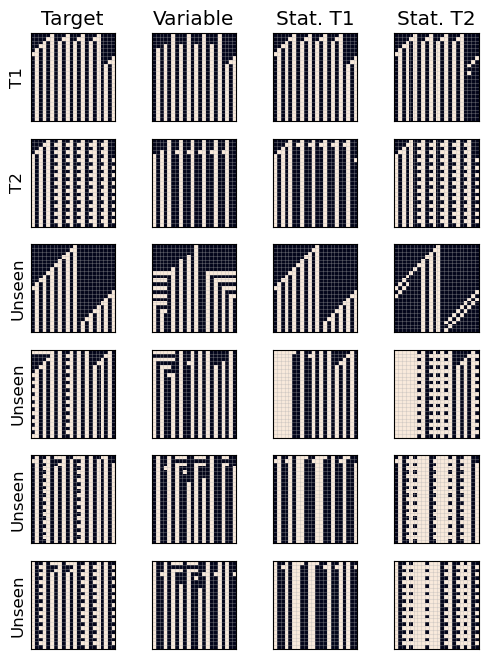

In [7]:
fig, axs = plt.subplots(6, 4, figsize=(6, 8), sharex=True, sharey=True)

plt.rcParams.update({"font.size": 12})

rep_id=0

for i in range(6):#looping through seeds
    helper.imshow_ca(all_targs[i], ax=axs[i,0])
    helper.imshow_ca(varied_phenos[i,rep_id,:,:], ax=axs[i,1])
    helper.imshow_ca(env1_phenos[i,rep_id,:,:], ax=axs[i,2])
    helper.imshow_ca(env2_phenos[i,rep_id,:,:], ax=axs[i,3])

axs[0,0].set_title('Target')
axs[0,1].set_title('Variable')
axs[0,2].set_title('Stat. T1')
axs[0,3].set_title('Stat. T2')

axs[0,0].set_ylabel("T1")
axs[1,0].set_ylabel("T2")
axs[2,0].set_ylabel("Unseen")
axs[3,0].set_ylabel("Unseen")
axs[4,0].set_ylabel("Unseen")
axs[5,0].set_ylabel("Unseen")

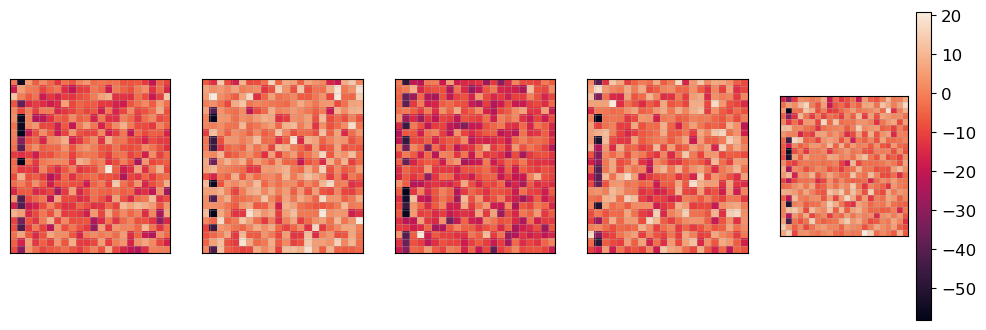

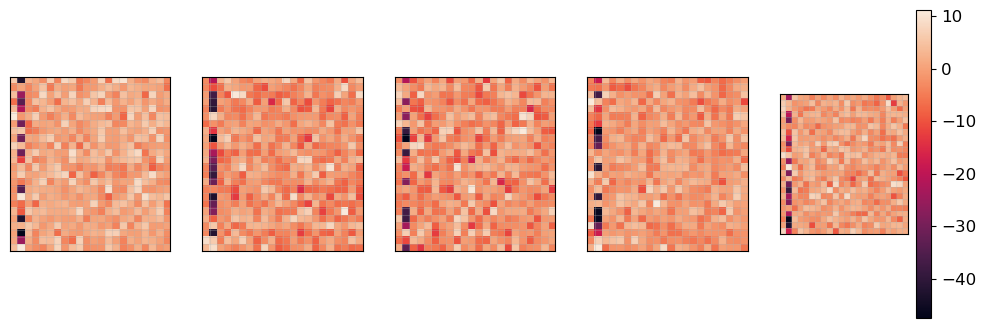

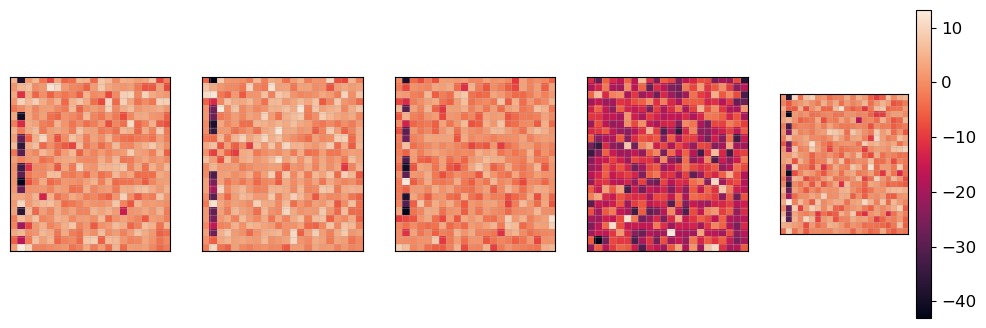

In [8]:
fig, axs = plt.subplots(ncols=5, nrows = 1, figsize=(12, 4))
for i,g in enumerate(varied_genos):
    im = helper.imshow_ca(g, ax=axs[i])
    if i == len(varied_genos)-1:
        fig.colorbar(im, ax=axs[-1])

fig, axs = plt.subplots(ncols=5, nrows = 1, figsize=(12, 4))
for i,g in enumerate(env1_genos):
    im = helper.imshow_ca(g, ax=axs[i])
    if i == len(env1_genos)-1:
        fig.colorbar(im, ax=axs[-1])

fig, axs = plt.subplots(ncols=5, nrows = 1, figsize=(12, 4))
for i,g in enumerate(env2_genos):
    im = helper.imshow_ca(g, ax=axs[i])
    if i == len(env2_genos)-1:
        fig.colorbar(im, ax=axs[-1])

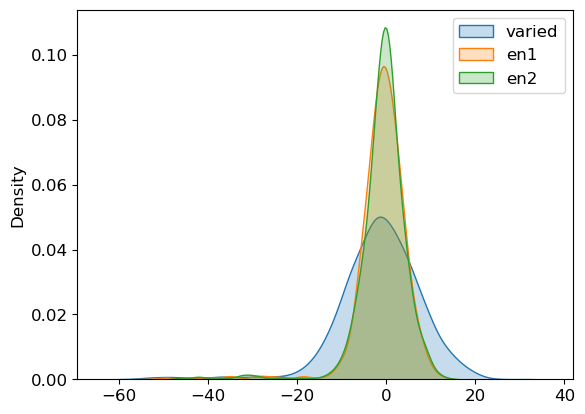

In [9]:
warnings.simplefilter(action='ignore', category=FutureWarning)
labels = ["varied", "en1", "en2"]
for l, t in enumerate([varied_genos, env1_genos, env2_genos]):
    all_vals=[]
    for i,g in enumerate(t):
        all_vals.append(g.flatten())
    all_vals = [x for xs in all_vals for x in xs]
    sns.kdeplot(all_vals,fill=True,label=labels[l])
plt.legend()
    

## GRN trajectories

In [2]:
# Load all GRNs, not just last

root="results_testing_saving/"

# Load GRN

# Parameters
rule = 30
grn_size = 22
num_cells = 22
dev_steps = 22
geneid = 1 #which gene was used to get fitness
seed_ints = ["69904-149796","69904","149796"]
season_lens=[300,20_000,20_000]
rules = [f"{rule}-{rule}", rule, rule]
num_repeats = 2

all_grns = []
for g in range(len(season_lens)):
    grns=[np.loadtxt(os.path.expanduser(root+f"stats_{season_lens[g]}_{rules[g]}_{seed_ints[g]}_{i+1}_best_grn.txt")) for i in range(num_repeats)]
    grns = np.array(grns)
    num_grns = int(grns.shape[1]/(grn_size+2)/grn_size)
    grns = grns.reshape(num_repeats,num_grns,grn_size+2,grn_size) #repeats, gens, weights1, weights2
    tmp=np.reshape(grns, (num_repeats,num_grns,(grn_size+2)*grn_size))
    all_grns.append(tmp)
all_grns=np.vstack(all_grns)
all_grns.shape

(6, 2000, 528)

(6, 1999, 528)
(6, 1999) 2 2000
(3, 2, 1999)


Text(0.5, 0, 'Generations')

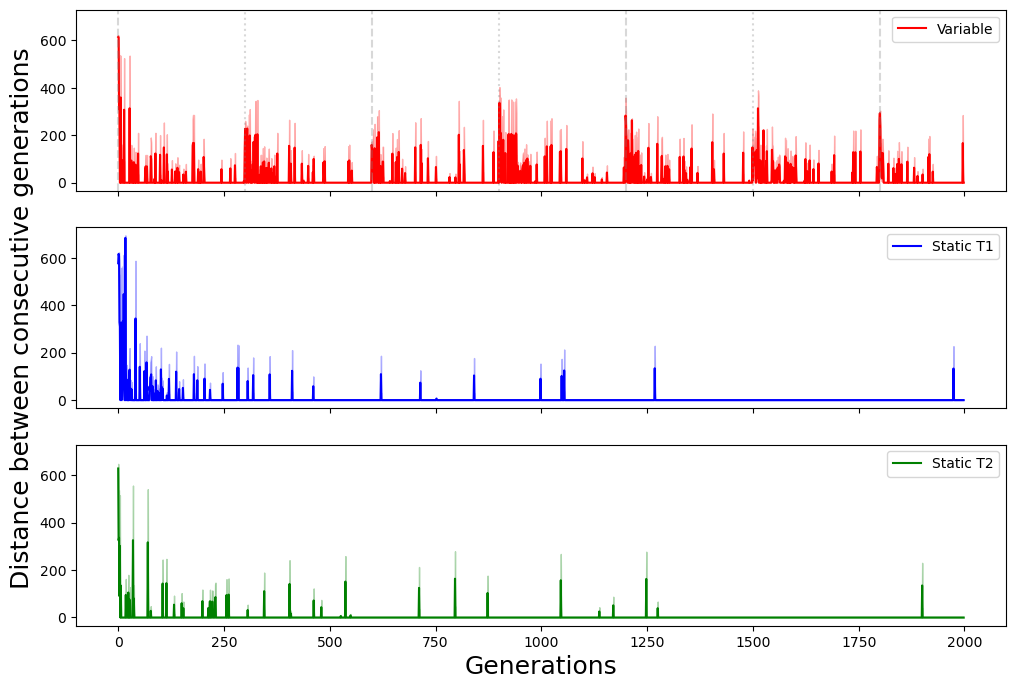

In [21]:
#Difference between consequtive generations
diff = np.abs(all_grns[:,1:] - all_grns[:,:-1])
print(diff.shape)
diff=np.sum(diff,axis=2) #total difference across weights
print(diff.shape, num_repeats,num_grns)
diff = np.reshape(diff, (3,num_repeats,num_grns-1))
print(diff.shape)

fig, ax = plt.subplots(figsize=(12,8), ncols=1, nrows=3, sharex=True, sharey=True)
cs=["red","blue","green"]
labels=["Variable", "Static T1", "Static T2", ]

for i in range(3):
    mean1 = np.mean(diff[i], axis=0) #average across replicated
    stderr1 = np.std(diff[i], axis=0) / np.sqrt(diff[i].shape[0])
    
    ax[i].plot(mean1,color=cs[i],label=labels[i])
    ax[i].fill_between(range(len(mean1)), mean1 - stderr1, mean1 + stderr1, color=cs[i], alpha=0.3)
    ax[i].legend()

for j in range(0, len(mean1), season_lens[0]):
    if j % (season_lens[0] * 2) == 0:
        ax[0].axvline(j, linestyle="--", color="gray", alpha=0.3)
    else:
        ax[0].axvline(j, linestyle=":", color="gray", alpha=0.3)
    
ax[1].set_ylabel("Distance between consecutive generations",fontsize=18)
plt.xlabel("Generations",fontsize=18)
#plt.savefig("figs/delta_gens.png")

In [23]:
#Difference from the first generation
diff = np.abs(all_grns[:,0,np.newaxis] - all_grns[:,:-1])
print(diff.shape)
diff=np.sum(diff,axis=2) #total difference across weights
print(diff.shape, num_repeats,num_grns)
diff = np.reshape(diff, (3,num_repeats,num_grns-1))
print(diff.shape)

(6, 1999, 528)
(6, 1999) 2 2000
(3, 2, 1999)


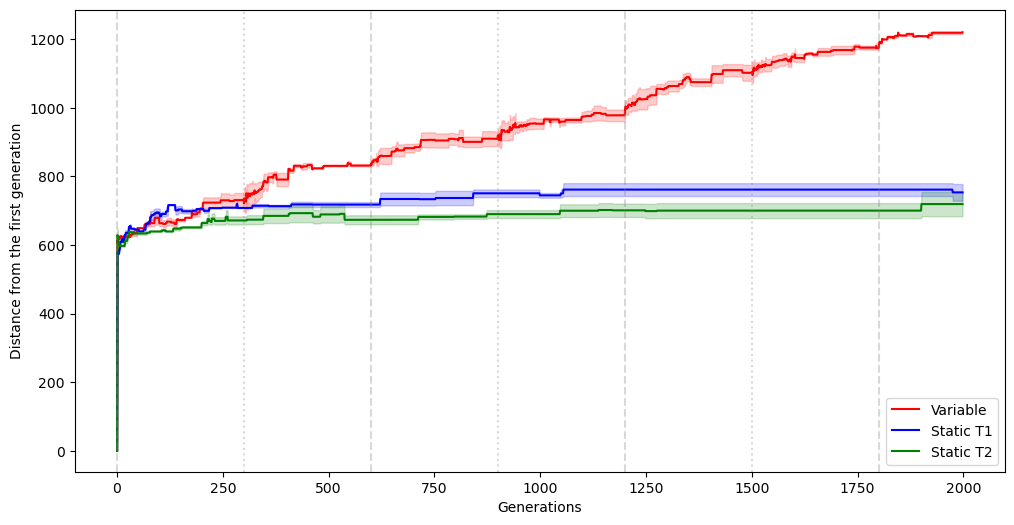

In [26]:
fig, ax = plt.subplots(figsize=(12,6))
for i in range(3):
    mean1 = np.mean(diff[i], axis=0)
    stderr1 = np.std(diff[i], axis=0) / np.sqrt(diff[i].shape[0])
    
    plt.plot(mean1,color=cs[i],label=labels[i])
    plt.fill_between(range(len(mean1)), mean1 - stderr1, mean1 + stderr1, color=cs[i], alpha=0.2)

for j in range(0, len(mean1), season_lens[0]):
    if j % (season_lens[0] * 2) == 0:
        ax.axvline(j, linestyle="--", color="gray", alpha=0.3)
    else:
        ax.axvline(j, linestyle=":", color="gray", alpha=0.3)

plt.ylabel("Distance from the first generation")
plt.xlabel("Generations")
plt.legend()
#plt.savefig("figs/delta_first.png")

In [54]:
num_generations=50
grn_size=22
check_freq = 150
test=np.array(list(range(2000)))
print(test[check_freq-1::check_freq])
temp_space=all_grns[:,check_freq-1::check_freq,:] #get spec generations
space=np.reshape(temp_space, (temp_space.shape[0]*temp_space.shape[1],(grn_size*(grn_size+2)))) #put together repeats and generations
space.shape

[ 149  299  449  599  749  899 1049 1199 1349 1499 1649 1799 1949]


(78, 528)

In [56]:
df = pd.DataFrame(space)

# Perform MDS transformation
mds = MDS(n_components=1, random_state=42)
mds_result = mds.fit_transform(df)
y=mds_result[:]
x=np.arange(temp_space.shape[1])

reps = [y[i*num_repeats*temp_space.shape[1]:(i+1)*num_repeats*temp_space.shape[1]].reshape(num_repeats,temp_space.shape[1]) for i in range(3)]

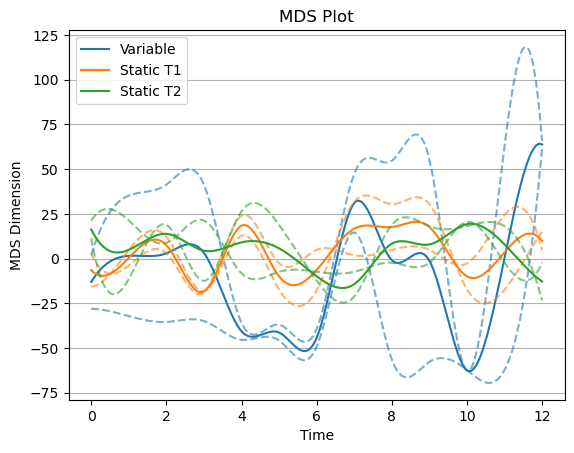

In [57]:
# Create a figure and axis
fig, ax = plt.subplots()

spline_res = 500

for i,rep in enumerate(reps):
    for run in rep:
        #plt.plot(x,val,c=color)
        spline = interp1d(np.arange(run.shape[0]), run, kind='cubic')
        fine_xs = np.linspace(x.min(), x.max(), spline_res)
        plt.plot(fine_xs, spline(fine_xs), "--", c=f"C{i}",alpha=0.6)

    m_rep = np.mean(rep, axis=0)
    spline = interp1d(np.arange(m_rep.shape[0]), m_rep, kind='cubic')
    fine_xs = np.linspace(x.min(), x.max(), spline_res)
    plt.plot(fine_xs, spline(fine_xs), c=f"C{i}",label=labels[i])

# Add axis labels and title
plt.xlabel('Time')
plt.ylabel('MDS Dimension')
plt.legend()
plt.title('MDS Plot')
plt.grid(axis="y")

# Show plot
plt.show()

In [58]:
df = pd.DataFrame(space)

# Perform MDS transformation
mds = MDS(n_components=2, random_state=42)
mds_result = mds.fit_transform(df)
y1=mds_result[:,0]
y2=mds_result[:,1]
x=np.arange(temp_space.shape[1])

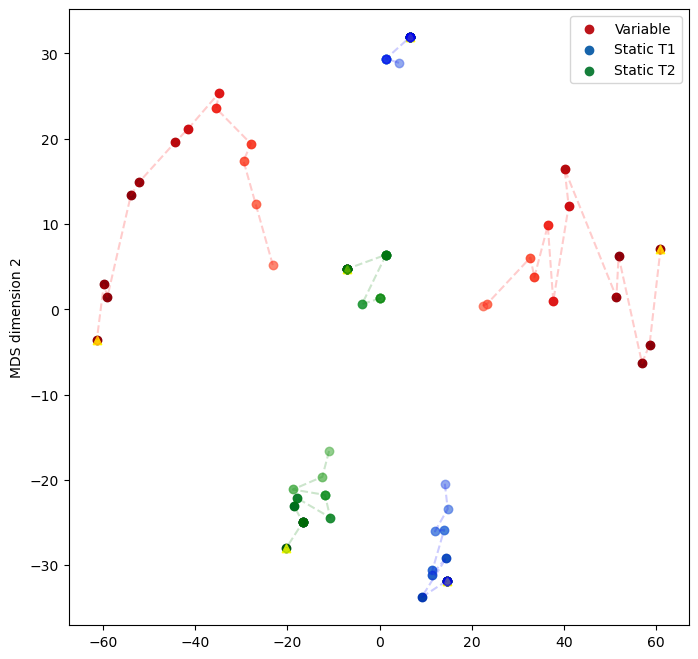

In [62]:
fig, ax = plt.subplots(figsize=(8,8))

s1=np.reshape(y1,(3,num_repeats,temp_space.shape[1]))
s2=np.reshape(y2,(3,num_repeats,temp_space.shape[1]))

cmaps=["Reds", "Blues", "Greens"]
cs=["red","blue","green"]
labels=["Variable","Static T1", "Static T2", ]

sel_runs=[] #3,5,12,13,14 not too much going around

for i in range(3):
    for j in range(num_repeats):
        color_map = plt.get_cmap(cmaps[i])
        num_points = len(s2[i][j])
        for p in range(num_points):
            # Calculate color based on index
            color = color_map(p / (num_points - 1)+0.3)  # Normalize index to [0, 1]
            #print(color)
            # Plot the point with adjusted color
            if p == int(num_points/2) and j==0:
                plt.scatter(s1[i][j][p], s2[i][j][p], color=color,label=labels[i])# edgecolor='black')
            else:
                plt.scatter(s1[i][j][p], s2[i][j][p], color=color)# edgecolor='black')
        plt.scatter(s1[i][j][-1], s2[i][j][-1], color="yellow", marker="^")
        plt.plot(s1[i][j],s2[i][j],c=cs[i], linestyle='--', marker='o',alpha=0.2,markeredgecolor=cs[i])
plt.ylabel("MDS dimension 1")
plt.ylabel("MDS dimension 2")
plt.legend()